In [104]:
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv("./Datos/USArrests.csv", sep=",")

In [106]:
datos = pd.DataFrame({'Murder': list(df["Murder"]), 'Assault': list(df["Assault"]), 'Rape': list(df["Rape"])})

## Apartado 1

### Conjunto de datos: 

- __nombre__: Arrestros en USA

- __Descripción__: Con los datos de los arrestros de 1973 se pretende agrupar los estados cuya tasa de arrestros sea similar, así como determinar cual es ese perfil y que estados pertenecen a él. 

- __tablaVariables__: tabla con los nombres de las variables y sus datos

In [139]:
datos.dtypes

Murder     float64
Assault      int64
Rape       float64
dtype: object

- __tablaEstadisticos__: tabla de estadísticos descriptivos de cada variable

In [108]:
datos.describe()

,Murder,Assault,Rape
count,50.00000,50.000000,50.000000
mean,7.78800,170.760000,21.232000
std,4.35551,83.337661,9.366385
min,0.80000,45.000000,7.300000
25%,4.07500,109.000000,15.075000
50%,7.25000,159.000000,20.100000
75%,11.25000,249.000000,26.175000
max,17.40000,337.000000,46.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c293b5810>,
      dtype=object)

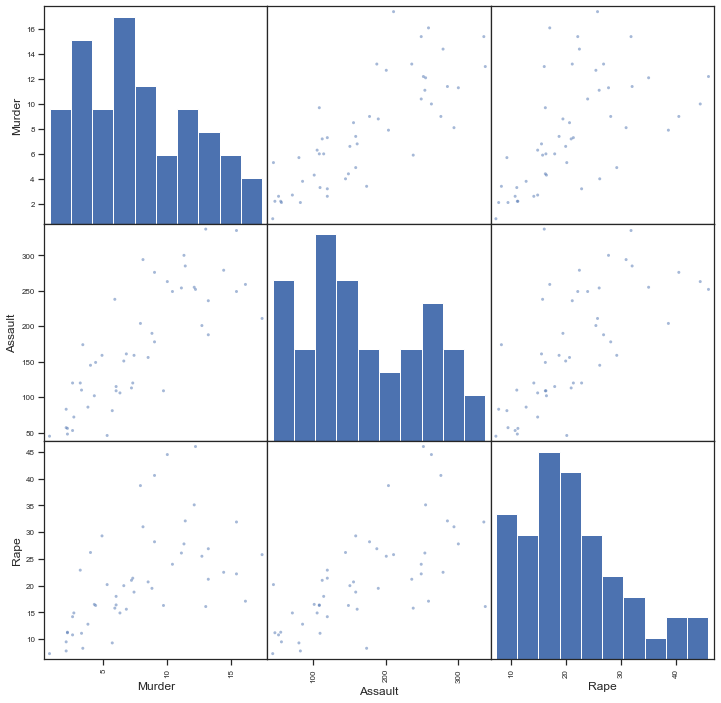

In [138]:
from pandas.plotting import scatter_matrix
scatter_matrix(datos, figsize = (12, 12), diagonal = 'hist')

### Conclusión:

Podemos ver que existe una correlación positiva ya que la recta de regresión es crecioente pero es débil, en unos casos más que en otros ya que en algunas gráficas los puntos estan mas dispersos que en otras. 


In [110]:
datos.corr(method = "pearson") 

,Murder,Assault,Rape
Murder,1.000000,0.801873,0.563579
Assault,0.801873,1.000000,0.665241
Rape,0.563579,0.665241,1.000000


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

--------

## Análisis de cada variable 

### 1. Murder

In [112]:
datos.Murder.describe()

count    50.00000
mean      7.78800
std       4.35551
min       0.80000
25%       4.07500
50%       7.25000
75%      11.25000
max      17.40000
Name: Murder, dtype: float64

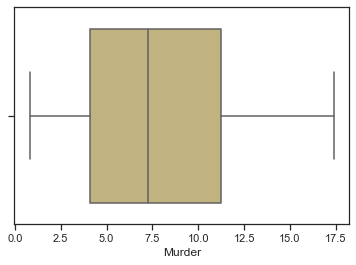

In [113]:
sns.boxplot(datos.Murder, color="y")

con esto puedo determinar que no hay datos anomalos ya que todos estan dentro del diagram de cajas. Por otro lado, garacias al diagrama de frecucnias y a los estadisticos descriptivos podemos observar que que la frecuancia de arrestros es mayor para valores bajos de estos, lo que hace que la mediana se vea un poco reducida respecto del máximo valor. 

### 2.Assault

In [114]:
datos.Assault.describe()

count     50.000000
mean     170.760000
std       83.337661
min       45.000000
25%      109.000000
50%      159.000000
75%      249.000000
max      337.000000
Name: Assault, dtype: float64

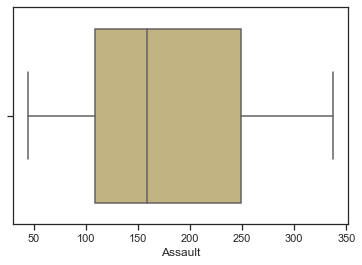

In [115]:
sns.boxplot(datos.Assault, color="y")

En este caso los valores de los arrestros estan mas distribuidos respcto de la frecuncia lo que hace que la mediana de arrestros no diste mucho del máximo al igula que del mínimo. Por otro lado, no hay valores atípicos ya que ningun valor sobrepaso el máximo. 

### 3.Rape

In [116]:
datos.Rape.describe()

count    50.000000
mean     21.232000
std       9.366385
min       7.300000
25%      15.075000
50%      20.100000
75%      26.175000
max      46.000000
Name: Rape, dtype: float64

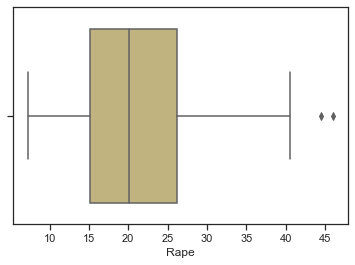

In [117]:
sns.boxplot(datos.Rape, color="y")

A diferencia de las dos variables anteriores en este diagrama de caja podemos observar como hay dos datos anómalos ya que se salen de los valores maximos del diagrama de cajas. 

--------

## Apartado 2
### Re-escalado

Dado que la diferencia del valor númerico entre la variable "Murder" respecto de "Assault" de sus máximos-minimos es bastante grande al igual que la de "Rape" con "Assault".
Decido realizar un escalado de las variables para que esten comprendidas en un rango  [0, 1]. 

In [118]:
from sklearn.preprocessing import MinMaxScaler

# Normalizamos los datos para que estén centrados en 0 y con varianza 1
scaler = MinMaxScaler()

scaler_df = scaler.fit_transform(datos)
scaler_df = pd.DataFrame(scaler_df, columns=['Murder', 'Assault', 'Rape'])

In [119]:
scaler_df.corr(method = "pearson")

,Murder,Assault,Rape
Murder,1.000000,0.801873,0.563579
Assault,0.801873,1.000000,0.665241
Rape,0.563579,0.665241,1.000000


Vemos que la correlacion de las variables se mantiene igual respecto de los datos originales. 

Al escalar los datos respecto de los mínimos y máximos podemos ver una fila que se mantiene en cero sus 3 columanas, esto nos indica que es el estado con menor número de asesinatos y por lo tanto el más seguro. 

In [120]:
scaler_df[33:34]

,Murder,Assault,Rape
33,0.0,0.0,0.0


## Apartado 3

In [121]:
import numpy as np
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [122]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','w','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

In [123]:
X = np.array(scaler_df)

### Algoritmo K-means 

In [124]:
from sklearn.cluster import KMeans

Aplicamos el algoritmo K-means con un K-Max = 7, esto quiere decir que el máximo de cluster será 7, luego haciendo un análisis del índice de    Davies Boulding podrémos indicar cual es el mejor número de cluster. 

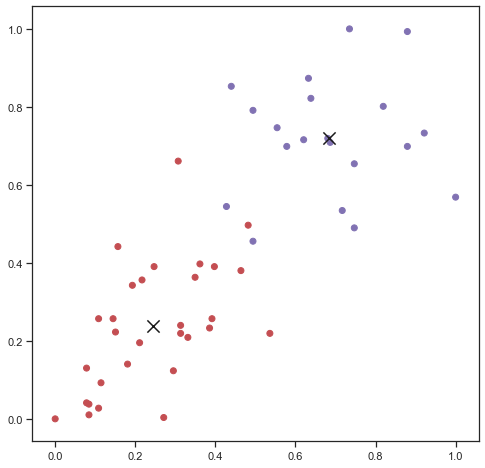

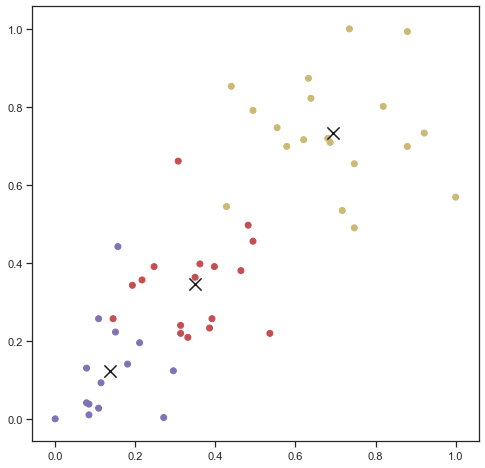

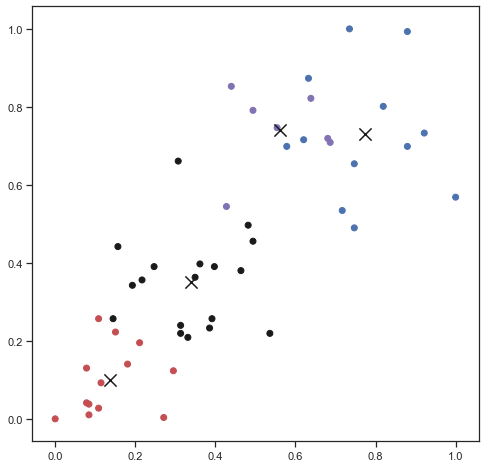

In [125]:
K_MAX = 5
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(X)
    plot_clusters(X, km.labels_, km.cluster_centers_)
    
    davies_boulding[k-2] = davies_bouldin_score(X, km.labels_) 

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

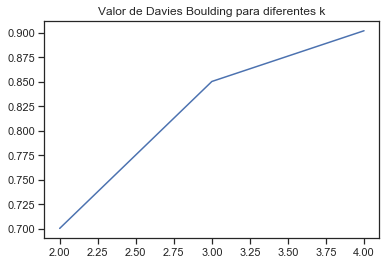

In [126]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

El indice de Davies Boulding es un cociente entre la dispersión de los clusters y la separación, podemos determinar lo compactos que estan cuanto mas bajo sea este índice. Así que podemos concluir que el mejor K es K = 2. 

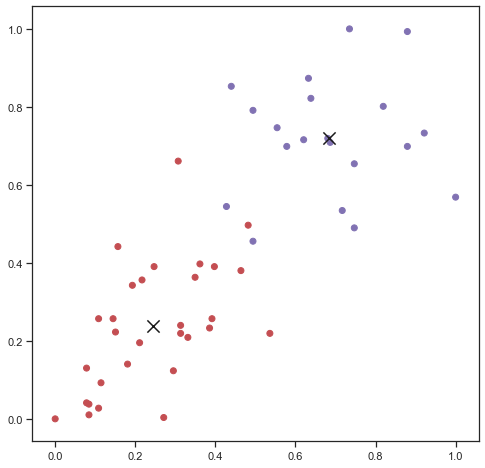

In [127]:
# Crear una instancia del agrupador k-means
km = KMeans(init='random', n_clusters=2, random_state=333)

# Agrupar los puntos en clusters
km.fit(X)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km.labels_
centers = km.cluster_centers_

plot_clusters(X, labels, centers)

In [128]:

km = KMeans(init='random', n_clusters=2, random_state=333)
km.fit(X)


centers = km.cluster_centers_
centers

array([[0.24518072, 0.23778539, 0.22334195],
       [0.68463855, 0.72003425, 0.56498708]])

In [129]:
import pandas as pd

# 
df = pd.DataFrame(data=X, columns=['x','y', 'z'])
df = df.assign(cluster=pd.Series(data=km.labels_))



DataFrame con los datos sin normalizar y ademas con la columana de clusters para poder hacer un mejor análisis mas adelante 

In [130]:
X2 = np.array(datos)

In [131]:
import pandas as pd

df2 = pd.DataFrame(data=X2, columns=['x','y', 'z'])
df2 = df2.assign(cluster=pd.Series(data=km.labels_))

In [132]:
df0 = df[df['cluster'] == 0]


Hay dos cluster uno con 30 estados (cluster = 0)estados y otro con 20 (cluster = 1) 

In [133]:
df1 = df[df['cluster'] == 1]


In [134]:
df2.groupby(["cluster"]).x.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,30.0,4.870,2.304291,0.8,2.825,4.65,6.525,9.7
1,20.0,12.165,2.684904,7.9,10.300,12.15,13.500,17.4


In [135]:
df2.groupby(["cluster"]).y.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,30.0,114.433333,47.48189,45.0,81.50,111.5,150.5,238.0
1,20.0,255.250000,44.11692,178.0,229.75,254.5,280.5,337.0


In [136]:
df2.groupby(["cluster"]).z.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,30.0,15.943333,5.460370,7.3,11.225,16.05,19.875,29.3
1,20.0,29.165000,8.386473,16.1,23.625,27.35,32.850,46.0


### Interpretacion de los cluster con los datos estadisticos

Se puede observar que el grupo de estados formados por el cluster __0__ es donde el máximo de arrestros es menor en comparacion con el otro cluster, esto significa que los estados del primer cluster son mas seguros además de que es un grupo mas grande. 

Por otro lado, los estados formados por el cluster __1__ son mas peligrosos ya que el máximo de arrestos es mayor en este grupo.

Finalmete, por el análisis de los datos hecho en el apartado 1 podemos decir que la causa predominante de detenciones es por "asalto"

### Matriz de gráficos de dispersión 

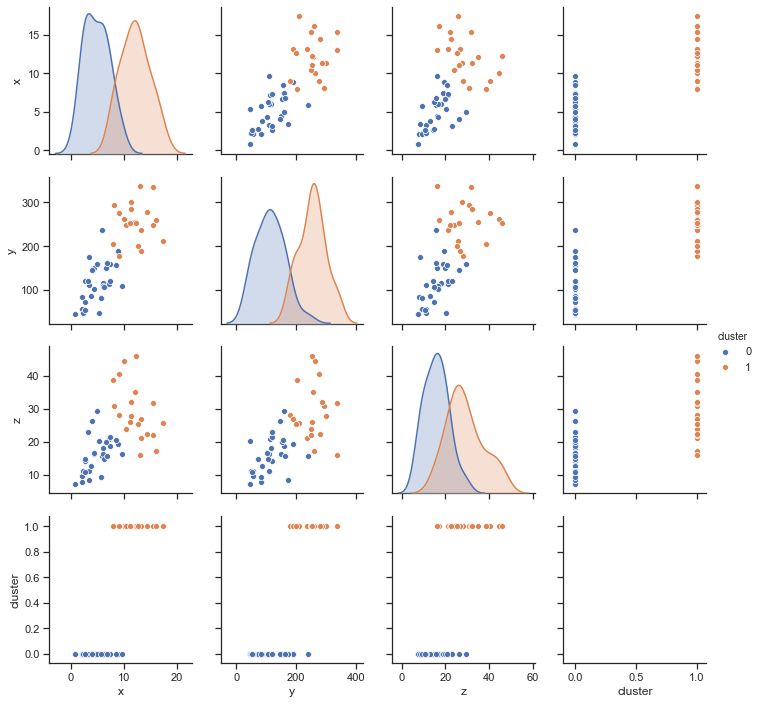

In [137]:
import seaborn as sns
sns.set(style="ticks")


sns.pairplot(df2, hue="cluster")